# SoftMax & Multiclass

## SoftMax

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
def my_softmax(z):
    ez = np.exp(z)
    sm = ez / np.sum(ez)
    return(sm)

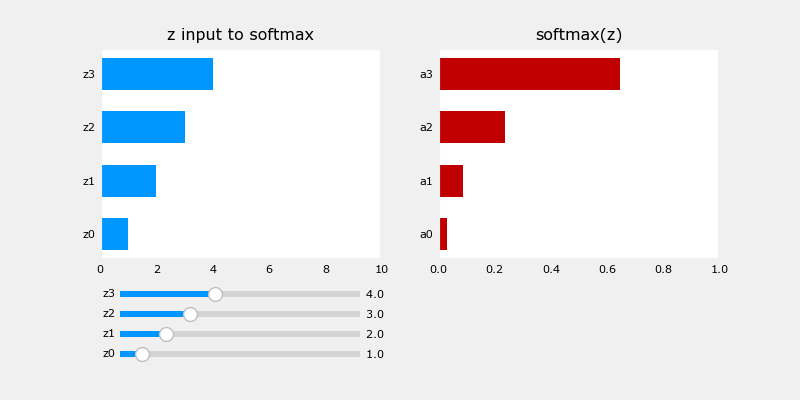

In [4]:
plt.close("all")
plt_softmax(my_softmax)

## Cost
<center> <img  src="./images/C2_W2_SoftMaxCost.png" width="400" />    <center/>

In [9]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
x_train, y_train = make_blobs(n_samples=20000, centers=centers, cluster_std=1.0, random_state=30)

In [10]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=4, activation='softmax')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - loss: 0.5086
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.0459
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0298
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.0262
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.0236
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.0241
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.0229
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0232
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.0193
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.0198


In [19]:
p_nonpreferred = model.predict(x_train)
print(p_nonpreferred[:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
[[6.19e-17 6.64e-09 2.74e-08 1.00e+00]
 [1.00e+00 3.59e-04 7.05e-05 3.06e-08]]
largest value 1.0 smallest value 1.1393036e-22


In [21]:
preferred_model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=4, activation='linear')
])
preferred_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

preferred_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - loss: 0.6998
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.0482
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.0308
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.0261
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.0242
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.0220
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.0228
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.0222
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 0.0198
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.0206


In [22]:
p_preferred = preferred_model.predict(x_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
two example output vectors:
 [[-9.25 -4.7   0.57 17.75]
 [ 8.84  0.42  0.26 -5.23]]
largest value 24.184336 smallest value -12.431535


### Output Handling
Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability. 
Let's look at the preferred model outputs:

The output predictions are not probabilities! If the desired output are probabilities, the output should be be processed by a softmax.

In [26]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[1.87e-12 1.77e-10 3.46e-08 1.00e+00]
 [1.00e+00 2.19e-04 1.87e-04 7.71e-07]]
largest value 1.0 smallest value 1.2529366e-16


In [27]:
for i in range(5):
    print(f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-9.25 -4.7   0.57 17.75], category: 3
[ 8.84  0.42  0.26 -5.23], category: 0
[-5.    6.31 -2.33 -4.51], category: 1
[-4.89  5.08 -1.19 -4.77], category: 1
[11.19  0.35 -0.11 -5.42], category: 0


In [34]:
p_preferred

array([[-9.25, -4.7 ,  0.57, 17.75],
       [ 8.84,  0.42,  0.26, -5.23],
       [-5.  ,  6.31, -2.33, -4.51],
       ...,
       [14.82, -0.82,  0.67, -5.88],
       [-6.7 ,  1.08,  2.96, -4.35],
       [-8.34, -4.27,  0.59, 15.92]], dtype=float32)

## SparseCategorialCrossentropy or CategoricalCrossEntropy
Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
- SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. 
- CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].


## Multiclass

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [35]:
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
x_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)

c:\Users\Chiayu\Desktop\Machine Learning & Deep Learning\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


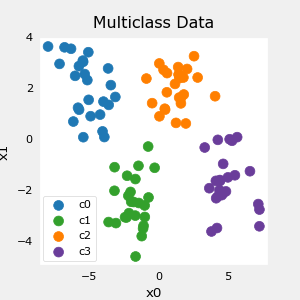

In [39]:
plt_mc(x_train, y_train, classes, centers, std=std)

In [42]:
print(f"unique classes {np.unique(y_train)}")
print(f"class representation {y_train[:10]}")
print(f"Shape of x_train: {x_train.shape}, shape of y_train {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
Shape of x_train: (100, 2), shape of y_train (100,)


In [43]:
tf.random.set_seed(1234)
model = Sequential([
    Dense(2, activation='relu', name = 'L1'),
    Dense(4, activation='linear', name = 'L2')
])

In [47]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)

model.fit(x_train, y_train, epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - loss: 1.3282
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1198 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.9677
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8700 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.8097  
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7647 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.7241
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6848 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6486 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.6162  
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.5871  
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5604 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.5353  
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.5111  
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4877 
Epoch 16/200
4/4

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step


c:\Users\Chiayu\Desktop\Machine Learning & Deep Learning\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


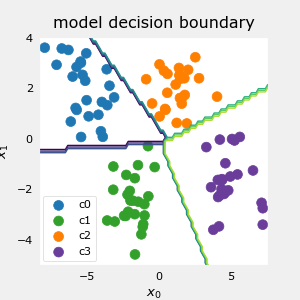

In [49]:
plt_cat_mc(x_train, y_train, model, classes)

Get the trained parameters from the first layer

In [51]:
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()
print(W1)
print(b1)

[[-2.19 -0.84]
 [-1.44  2.73]]
[2.08 1.88]


c:\Users\Chiayu\Desktop\Machine Learning & Deep Learning\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
c:\Users\Chiayu\Desktop\Machine Learning & Deep Learning\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


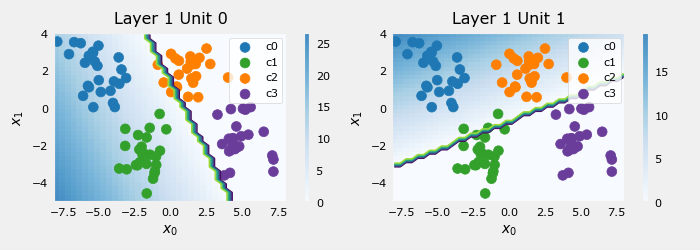

In [52]:
plt_layer_relu(x_train, y_train.reshape(-1,), W1, b1, classes)

[[ 0.79  1.37 -2.29 -0.56]
 [ 0.35 -1.42  1.51 -2.23]]
[-1.97 -0.84 -1.34  2.91]


c:\Users\Chiayu\Desktop\Machine Learning & Deep Learning\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
c:\Users\Chiayu\Desktop\Machine Learning & Deep Learning\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
c:\Users\Chiayu\Desktop\Machine Learning & Deep Learning\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
c:\Users\Chiayu\Desktop\Machine Learning & Deep Learning\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


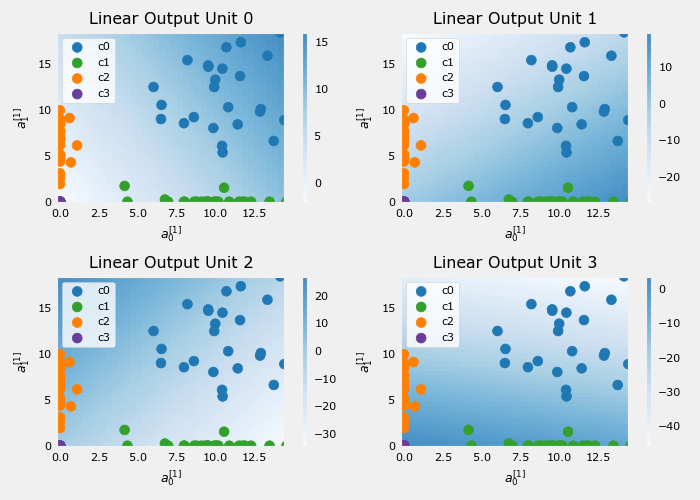

In [54]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
print(W2)
print(b2)
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(x_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

## Explanation
#### Layer 1    
<img align="Right" src="./images/C2_W2_mclass_layer1.png"  style=" width:800px; padding: 10px 20px ; ">   

   
These plots show the function of Units 0 and 1 in the first layer of the network. The inputs are ($x_0,x_1$) on the axis. The output of the unit is represented by the color of the background. This is indicated by the color bar on the right of each graph. Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 20 at their peaks. 
The contour lines in this graph show the transition point between the output, $a^{[1]}_j$ being zero and non-zero. Recall the graph for a ReLu :   
<img align="right" src="./images/C2_W2_mclass_relu.png"  style=" width:200px; padding: 10px 20px ; ">    
   
   The contour line in the graph is the inflection point in the ReLu.

Unit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will output a value greater than zero.  
Unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a zero, while points below will output a value greater than zero. Let's see how this works out in the next layer!